"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

AUTHOR: Rhys Alfred Shaw

DATE: 01/21

This notebook was submitted as the individual piece of work for my Msc cource for:
Applied Machine Learning, and each seciton is described below

I was awarded 83/100.

TLDR: Its a comparison of 3 ML models to best determine user purchase intensions.

# CMT 307 Coursework 1: 2056639

In [1]:
# importing all functions used in the program
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [2]:
customerdata = pd.read_csv('Coursework_1_data(1).csv')

# Data Exploration

In [3]:
customerdata.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
print(customerdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
customerdata.describe()

pertrue_Revneue = np.sum(customerdata['Revenue']/12330)
print("Percentage of Revenue that is True (resulted in a purchase): {:.2f} %".format(pertrue_Revneue*100))
customerdata['Revenue'].value_counts()

Percentage of Revenue that is True (resulted in a purchase): 15.47 %


False    10422
True      1908
Name: Revenue, dtype: int64

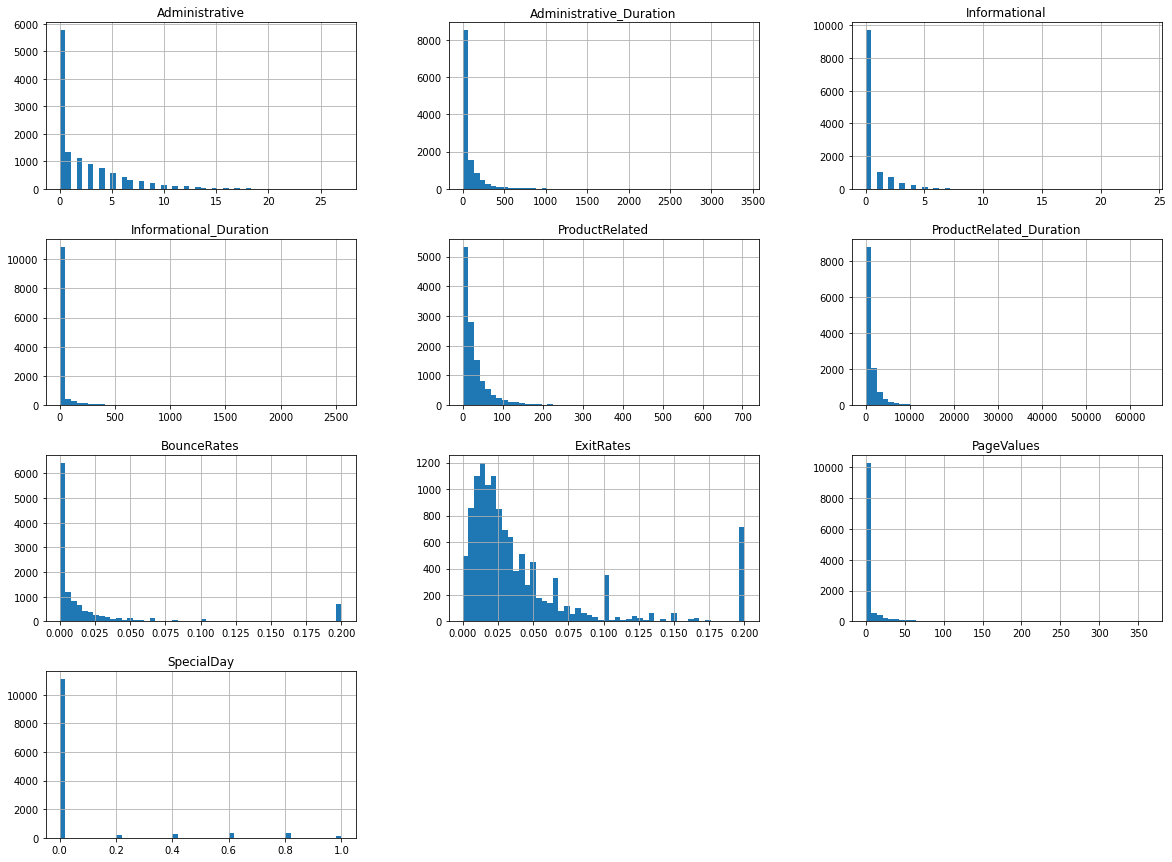

In [6]:
customerdata_num = customerdata[['Administrative', 'Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates', 'ExitRates','PageValues','SpecialDay']]
customerdata_num.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
corr_matrix = customerdata.corr()
corr_matrix['Revenue'].sort_values(ascending=False)

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

# Data Pre-processing

choice for the use of a scalar and Encoder are mentioned in the report.

In [8]:
customerdata_X = customerdata[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend']]
customerdata_Y = customerdata[['Revenue']]

X_train, X_test, Y_train, Y_test = train_test_split(customerdata_X,customerdata_Y,test_size=0.3, random_state=42)

In [9]:
categorical_features = ['OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']
categorical_transformer = Pipeline([('imputer_cat', SimpleImputer(strategy = 'most_frequent')),('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

numeric_features = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
numeric_transformer = Pipeline([('scaler', StandardScaler())])

preprocessor = ColumnTransformer([('categoricals', categorical_transformer, categorical_features),('numericals', numeric_transformer, numeric_features)],remainder = 'drop')

# ML Models

In [10]:
# The fucntion below will do all the nesesary analysis to evaluate our models.
def cufusiinmatrix_plot(pipeline,X_train,Y_train,X_test,Y_test):
    pipeline.fit(X_train, Y_train)
    y_pred = pipeline.predict(X_test)

    matrix = confusion_matrix(Y_test, y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':20},
                cmap=plt.cm.Blues, linewidths=0.2)

    class_names = ['False', 'True']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks + 0.5, class_names)
    plt.yticks(tick_marks2, class_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Classifier')
    plt.show()     
    print(classification_report(Y_test, y_pred))
    return accuracy_score(Y_test, y_pred)

# Model 1: KNN Classfier

C:\Users\rhysc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


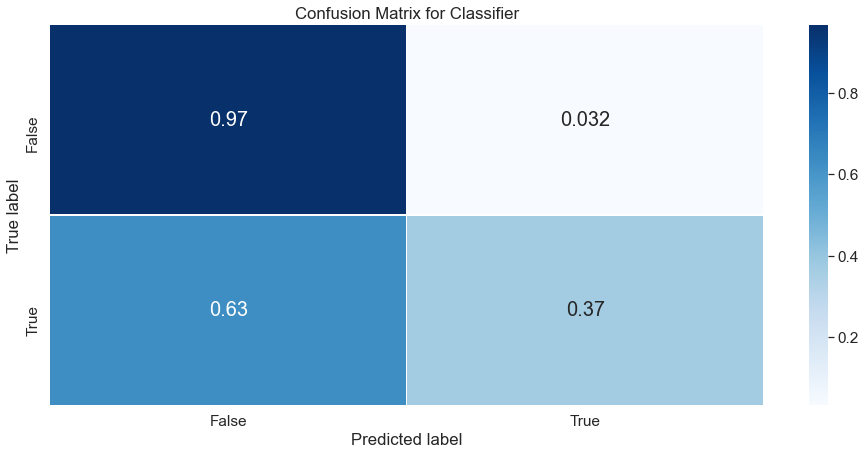

              precision    recall  f1-score   support

       False       0.89      0.97      0.93      3124
        True       0.68      0.37      0.48       575

    accuracy                           0.87      3699
   macro avg       0.79      0.67      0.70      3699
weighted avg       0.86      0.87      0.86      3699



0.8745606920789403

In [11]:
KNNClassfier = Pipeline([('preprocessing', preprocessor),('classifier', KNeighborsClassifier())])
cufusiinmatrix_plot(KNNClassfier,X_train,Y_train,X_test,Y_test)

Lets look if this will change if we remove features that have a low correlation to Revenue.

# Data without certain features.

In [12]:
customerdata.info()
customerdata.drop(['Weekend','Browser','TrafficType','Region','OperatingSystems','Month'],axis=1, inplace=True)
customerdata.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,VisitorType,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Returning_Visitor,False


In [13]:
customerdata_X = customerdata[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'VisitorType']]
customerdata_Y = customerdata[['Revenue']]

X_train, X_test, Y_train, Y_test = train_test_split(customerdata_X,customerdata_Y,test_size=0.3, random_state=42)

In [14]:
categorical_features = ['VisitorType']
categorical_transformer = Pipeline([('imputer_cat', SimpleImputer(strategy = 'most_frequent')),('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

numeric_features = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
numeric_transformer = Pipeline([('scaler', StandardScaler())])

preprocessor = ColumnTransformer([('categoricals', categorical_transformer, categorical_features),('numericals', numeric_transformer, numeric_features)],remainder = 'drop')

C:\Users\rhysc\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


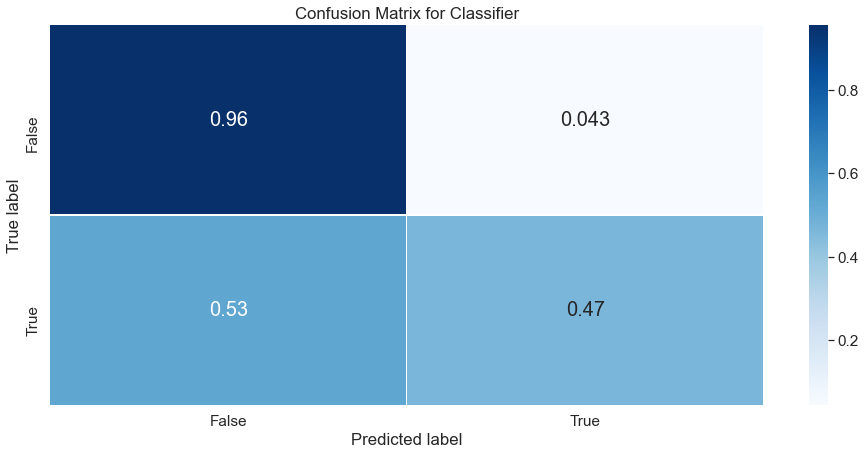

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      3124
        True       0.67      0.47      0.55       575

    accuracy                           0.88      3699
   macro avg       0.79      0.71      0.74      3699
weighted avg       0.87      0.88      0.87      3699



0.8807785888077859

In [15]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', KNeighborsClassifier())])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)

From this it seems that removing these features, that have little correlation with revenue, actually imporves the models preformance. As we see and increase in True recall and accuracy. 

# Model 1: Tunning Hyperparameters.

In [16]:
def KNN_Hyper(X_train,Y_train,parameter,N):
    space = dict(classifier__leaf_size = list(range(1,50)),
         classifier__n_neighbors = list(range(1,30)), 
         classifier__p = [1,2])

    myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', KNeighborsClassifier())])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    search = RandomizedSearchCV(myClassfier, space, n_iter=N, scoring=parameter, n_jobs=-1, cv=cv, random_state=1)

    result = search.fit(X_train,Y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

Recall

In [17]:
KNN_Hyper(X_train,Y_train,'recall',100) 

Best Score: 0.5128791578556193
Best Hyperparameters: {'classifier__p': 1, 'classifier__n_neighbors': 1, 'classifier__leaf_size': 19}


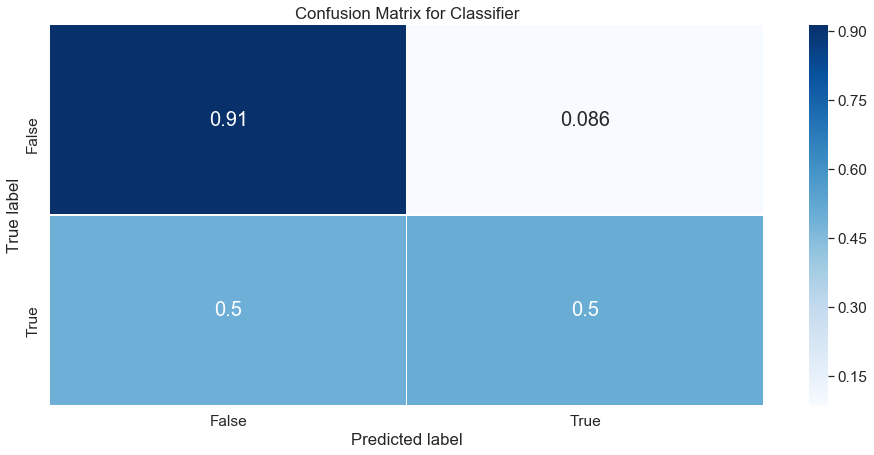

              precision    recall  f1-score   support

       False       0.91      0.91      0.91      3124
        True       0.52      0.50      0.51       575

    accuracy                           0.85      3699
   macro avg       0.71      0.71      0.71      3699
weighted avg       0.85      0.85      0.85      3699



0.8499594484995945

In [18]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', KNeighborsClassifier(p=1,n_neighbors=1,leaf_size=36))])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)

What if we use different scoring?

Accuracy

In [19]:
KNN_Hyper(X_train,Y_train,'accuracy',100)

Best Score: 0.890201985092496
Best Hyperparameters: {'classifier__p': 2, 'classifier__n_neighbors': 27, 'classifier__leaf_size': 41}


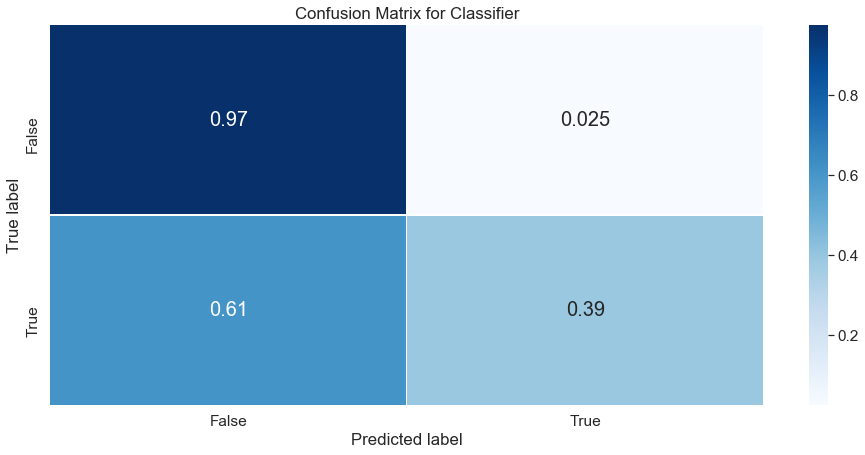

              precision    recall  f1-score   support

       False       0.90      0.97      0.93      3124
        True       0.74      0.39      0.51       575

    accuracy                           0.88      3699
   macro avg       0.82      0.68      0.72      3699
weighted avg       0.87      0.88      0.87      3699



0.8837523655041903

In [20]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', KNeighborsClassifier(p=2,n_neighbors=14,leaf_size=27))])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)

Precision scoring

In [21]:
KNN_Hyper(X_train,Y_train,'precision',100)

Best Score: 0.7748781843403311
Best Hyperparameters: {'classifier__p': 1, 'classifier__n_neighbors': 26, 'classifier__leaf_size': 5}


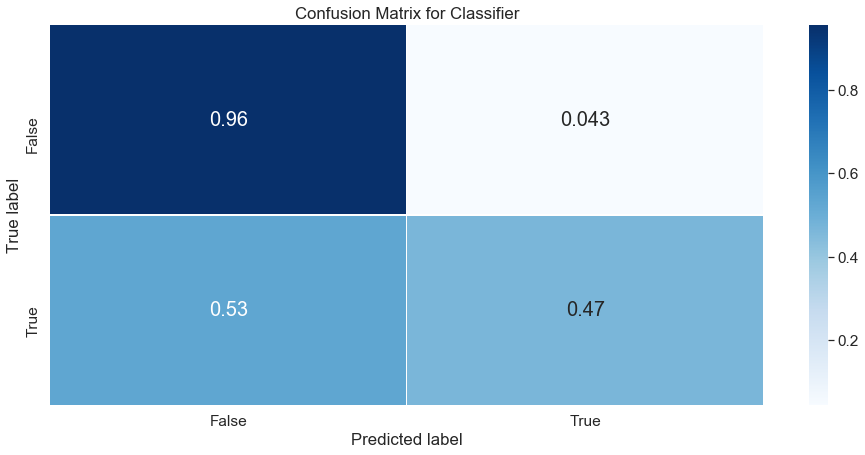

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      3124
        True       0.67      0.47      0.55       575

    accuracy                           0.88      3699
   macro avg       0.79      0.71      0.74      3699
weighted avg       0.87      0.88      0.87      3699



0.8807785888077859

In [22]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', KNeighborsClassifier(p=2,n_neighbors=5,leaf_size=36))])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)

Looking at these result we will want to use recall for the scoring. As we want to decrease the amount of TrueFalses and Increase TrueTrue.

# Model 2: Decision Trees

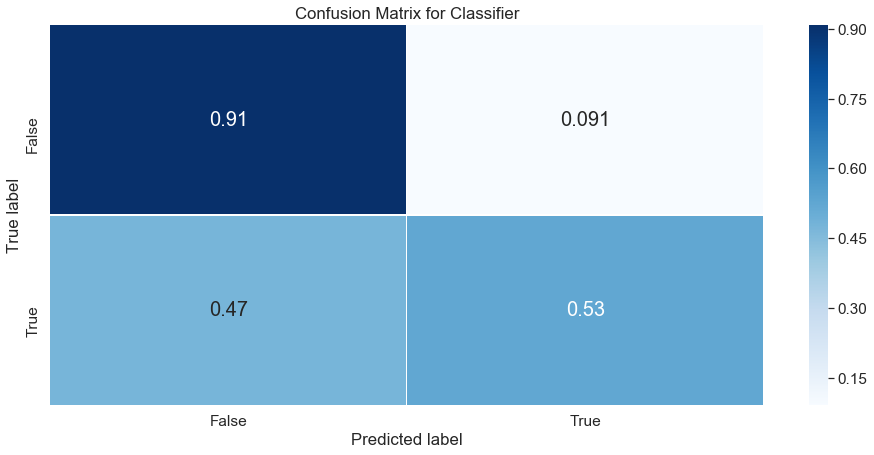

              precision    recall  f1-score   support

       False       0.91      0.91      0.91      3124
        True       0.51      0.53      0.52       575

    accuracy                           0.85      3699
   macro avg       0.71      0.72      0.72      3699
weighted avg       0.85      0.85      0.85      3699



0.8491484184914841

In [23]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', DecisionTreeClassifier(random_state=42))])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)

# Model 2: Tunning Hyperparameters

In [24]:
def DT_Hyper(X_train,Y_train,parameter,N):
    space = dict(classifier__criterion = ['gini', 'entropy'],
         classifier__max_depth = list(range(1, 20)), 
         classifier__min_samples_split = list(range(2, 15)), 
         classifier__max_leaf_nodes = list(range(5, 30)))

    myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', DecisionTreeClassifier(random_state=42))])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    search = RandomizedSearchCV(myClassfier, space, n_iter=N, scoring=parameter, n_jobs=-1, cv=cv, random_state=1)

    result = search.fit(customerdata_X,customerdata_Y)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [25]:
DT_Hyper(X_test,Y_train,'recall',100)

Best Score: 0.8022407846388874
Best Hyperparameters: {'classifier__min_samples_split': 8, 'classifier__max_leaf_nodes': 13, 'classifier__max_depth': 1, 'classifier__criterion': 'entropy'}


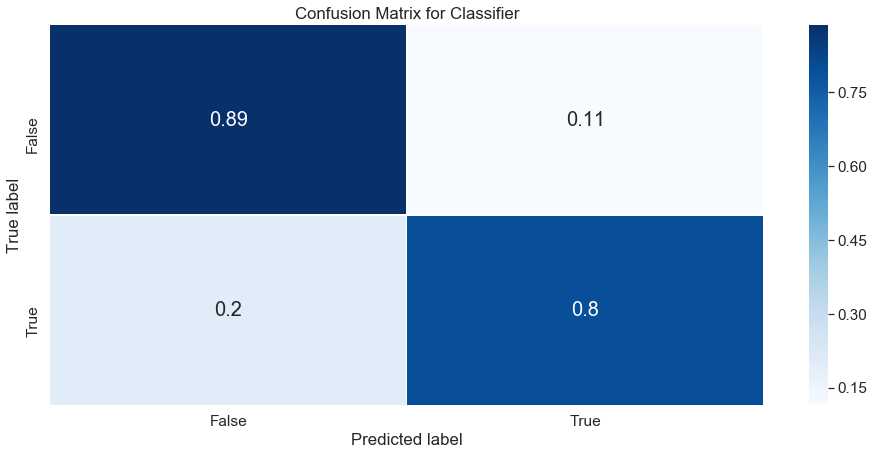

              precision    recall  f1-score   support

       False       0.96      0.89      0.92      3124
        True       0.56      0.80      0.66       575

    accuracy                           0.87      3699
   macro avg       0.76      0.84      0.79      3699
weighted avg       0.90      0.87      0.88      3699



0.8721276020546094

In [28]:

myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', DecisionTreeClassifier(criterion='entropy',max_depth=1,max_leaf_nodes=13,min_samples_split=8))])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)


In [29]:
DT_Hyper(X_test,Y_train,'accuracy',100)

Best Score: 0.8955934036226006
Best Hyperparameters: {'classifier__min_samples_split': 13, 'classifier__max_leaf_nodes': 21, 'classifier__max_depth': 6, 'classifier__criterion': 'gini'}


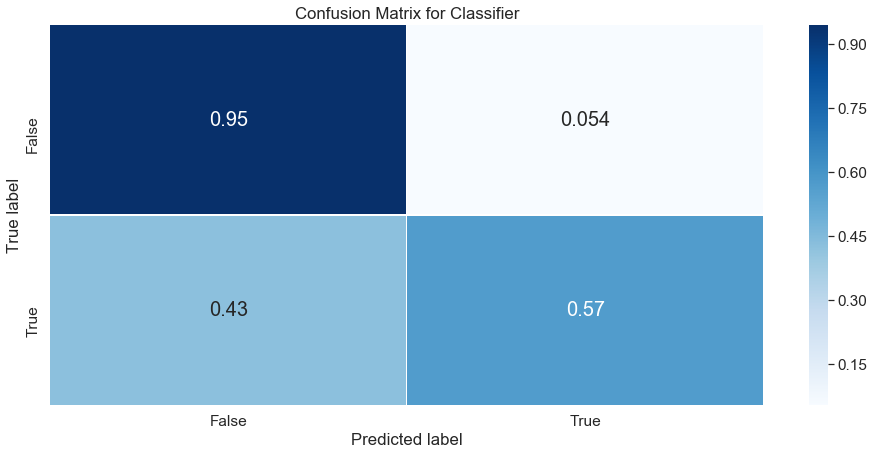

              precision    recall  f1-score   support

       False       0.92      0.95      0.93      3124
        True       0.66      0.57      0.61       575

    accuracy                           0.89      3699
   macro avg       0.79      0.76      0.77      3699
weighted avg       0.88      0.89      0.88      3699



0.8878075155447418

In [30]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', DecisionTreeClassifier(criterion='gini',max_depth=6,max_leaf_nodes=21,min_samples_split=13))])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)

In [31]:
DT_Hyper(X_test,Y_train,'precision',100)

Best Score: 0.7855094104638913
Best Hyperparameters: {'classifier__min_samples_split': 2, 'classifier__max_leaf_nodes': 5, 'classifier__max_depth': 14, 'classifier__criterion': 'gini'}


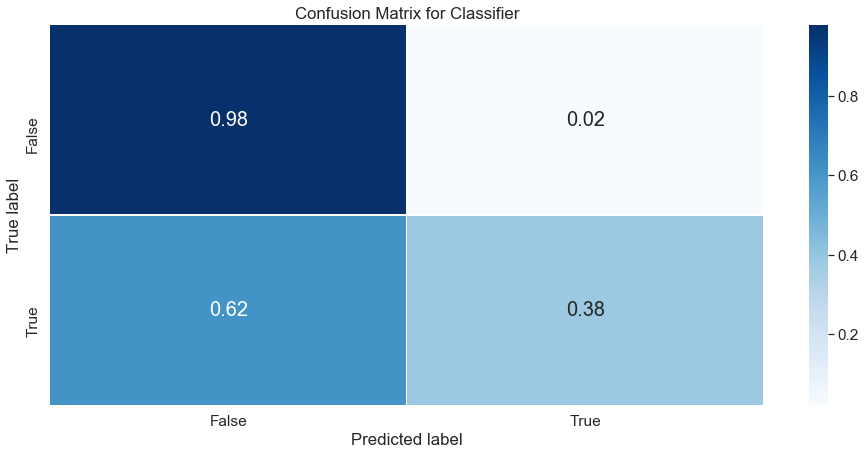

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      3124
        True       0.78      0.38      0.52       575

    accuracy                           0.89      3699
   macro avg       0.84      0.68      0.73      3699
weighted avg       0.88      0.89      0.87      3699



0.8875371722087051

In [32]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', DecisionTreeClassifier(criterion='gini',max_depth=14,max_leaf_nodes=5,min_samples_split=2))])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)

# Model 3: SVM

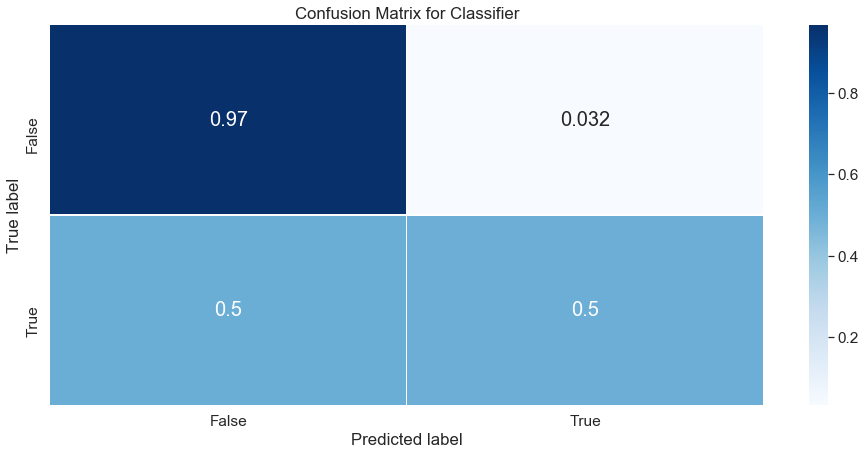

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      3124
        True       0.74      0.50      0.60       575

    accuracy                           0.90      3699
   macro avg       0.83      0.73      0.77      3699
weighted avg       0.89      0.90      0.89      3699



0.8951067856177345

In [33]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', svm.SVC())])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)

# Model 3: Tunning Hyperparameters

In [34]:
def SVM_Hyper(X_train,Y_train,parameter,N):
    space = dict(classifier__kernel=['rbf','linear'],
            classifier__C = [0.01,1,10],
            classifier__gamma=[0.1,5])

    myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', svm.SVC())])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    search = RandomizedSearchCV(myClassfier, space, n_iter=N, scoring=parameter, n_jobs=-1, cv=cv, random_state=1)

    result = search.fit(X_train,Y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [35]:
SVM_Hyper(X_train,Y_train,'recall',100)

Best Score: 0.5151312827085957
Best Hyperparameters: {'classifier__kernel': 'rbf', 'classifier__gamma': 0.1, 'classifier__C': 10}


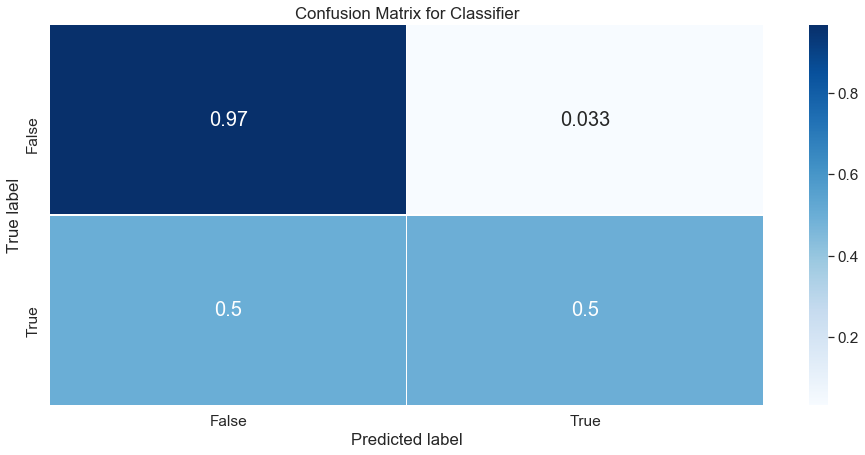

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      3124
        True       0.74      0.50      0.59       575

    accuracy                           0.89      3699
   macro avg       0.82      0.73      0.77      3699
weighted avg       0.89      0.89      0.89      3699



0.8940254122735874

In [36]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', svm.SVC(kernel='rbf',gamma=0.1,C=1))])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)

In [37]:
SVM_Hyper(X_train,Y_train,'accuracy',100)

Best Score: 0.8943343760862009
Best Hyperparameters: {'classifier__kernel': 'rbf', 'classifier__gamma': 0.1, 'classifier__C': 1}


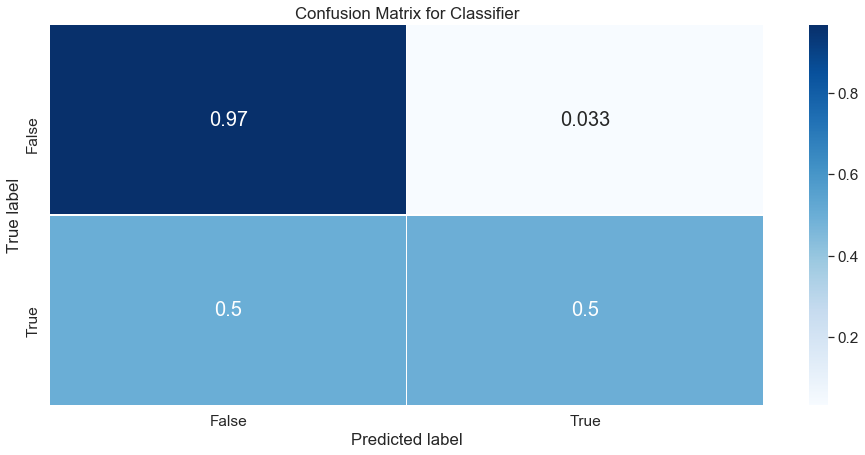

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      3124
        True       0.74      0.50      0.59       575

    accuracy                           0.89      3699
   macro avg       0.82      0.73      0.77      3699
weighted avg       0.89      0.89      0.89      3699



0.8940254122735874

In [38]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', svm.SVC(kernel='rbf',gamma=0.1,C=1))])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)

In [39]:
SVM_Hyper(X_train,Y_train,'precision',100)

Best Score: 0.8290775056270963
Best Hyperparameters: {'classifier__kernel': 'rbf', 'classifier__gamma': 0.1, 'classifier__C': 0.01}


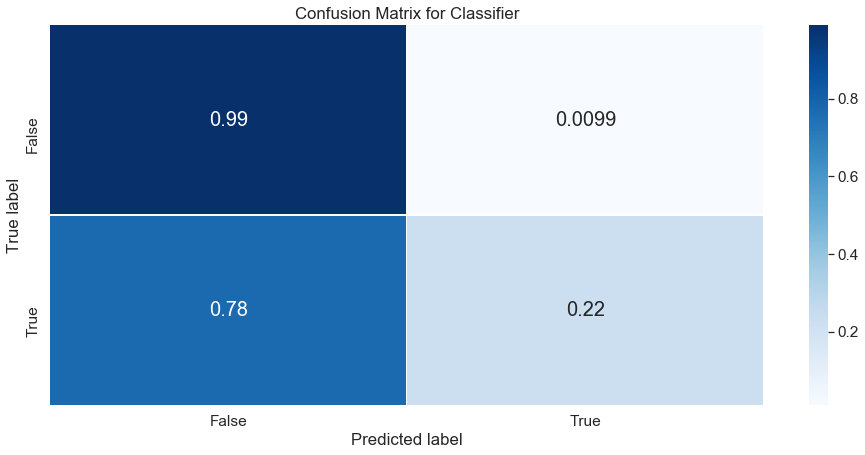

              precision    recall  f1-score   support

       False       0.87      0.99      0.93      3124
        True       0.81      0.22      0.35       575

    accuracy                           0.87      3699
   macro avg       0.84      0.61      0.64      3699
weighted avg       0.86      0.87      0.84      3699



0.8710462287104623

In [40]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', svm.SVC(kernel='rbf',gamma=0.1,C=0.01))])
cufusiinmatrix_plot(myClassfier,X_train,Y_train,X_test,Y_test)

# Model Comparison

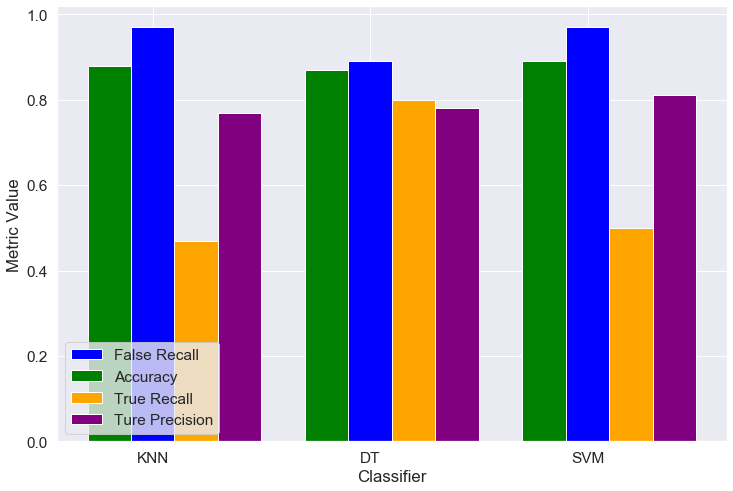

In [41]:
X = ['KNN','DT','SVM']
Recall_F = [0.97,0.89,0.97]  
Accuracy = [0.88,0.87,0.89] 
Recall_T = [0.47,0.8,0.50] 
Precision = [0.77,0.78,0.81] #when optimized.
x_pos = [i for i, _ in enumerate(X)]

plt.figure(figsize=[12,8])
plt.bar(x_pos,Recall_F,width=0.2,color='blue',label='False Recall')
plt.bar([i - 0.2 for i in x_pos],Accuracy,width=0.2,color='green',label='Accuracy')
plt.bar([i + 0.2 for i in x_pos],Recall_T,width=0.2,color='orange',label='True Recall')
plt.bar([i+0.4 for i in x_pos],Precision,width=0.2,color='purple',label='Ture Precision')
plt.xlabel('Classifier')
plt.ylabel('Metric Value')
plt.xticks(x_pos, X)
plt.legend(loc='lower left')
plt.show()

# Can we improve the preformance with using a imblanced compensation method.

The following code experiments with the use of a oversampling will improve the model preformance. 

In [42]:
customerdata = pd.read_csv('Coursework_1_data(1).csv')
customerdata_X = customerdata[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'VisitorType']]
customerdata_Y = customerdata[['Revenue']]
X_train, X_test, Y_train, Y_test = train_test_split(customerdata_X,customerdata_Y,test_size=0.3, random_state=42)
df_train = X_train
df_train['Revenue'] = Y_train


In [43]:

count_class_False, count_class_True = df_train.Revenue.value_counts()

customerdata_class_False = df_train[df_train['Revenue'] == False]
customerdata_class_True = df_train[df_train['Revenue'] == True]
customerdata_class_True_over = customerdata_class_True.sample(count_class_False, replace=True)
customerdata_test_over = pd.concat([customerdata_class_False, customerdata_class_True_over], axis=0)

print('Random over-sampling:')
print(customerdata_test_over.Revenue.value_counts())

X_new = customerdata_test_over[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'VisitorType']]
Y_new = customerdata_test_over[['Revenue']]

Random over-sampling:
True     7298
False    7298
Name: Revenue, dtype: int64


In [44]:
customerdata_test_over

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,VisitorType,Revenue
8077,0,0.000000,0,0.000000,5,81.083333,0.040000,0.050000,0.000000,0.0,New_Visitor,False
1568,0,0.000000,0,0.000000,3,189.000000,0.000000,0.066667,0.000000,0.0,Returning_Visitor,False
462,0,0.000000,1,132.000000,8,445.000000,0.000000,0.014286,0.000000,0.0,Returning_Visitor,False
743,0,0.000000,0,0.000000,3,0.000000,0.200000,0.200000,0.000000,0.0,Returning_Visitor,False
222,0,0.000000,0,0.000000,4,14.000000,0.100000,0.150000,0.000000,0.0,Returning_Visitor,False
11348,4,33.000000,0,0.000000,35,702.916667,0.000000,0.005429,0.000000,0.0,New_Visitor,False
3912,14,375.278571,0,0.000000,156,5432.836783,0.010010,0.029075,2.992268,1.0,Returning_Visitor,False
625,2,102.000000,0,0.000000,16,502.833333,0.000000,0.004444,0.000000,0.0,Returning_Visitor,False
10658,1,61.250000,3,1083.000000,14,2230.500000,0.000000,0.011765,0.000000,0.0,Returning_Visitor,False
11330,0,0.000000,0,0.000000,10,83.416667,0.000000,0.022222,0.000000,0.0,Returning_Visitor,False


In [45]:

categorical_features = ['VisitorType']
categorical_transformer = Pipeline([('imputer_cat', SimpleImputer(strategy = 'most_frequent')),('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

numeric_features = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
numeric_transformer = Pipeline([('scaler', StandardScaler())])

preprocessor = ColumnTransformer([('categoricals', categorical_transformer, categorical_features),('numericals', numeric_transformer, numeric_features)],remainder = 'drop')

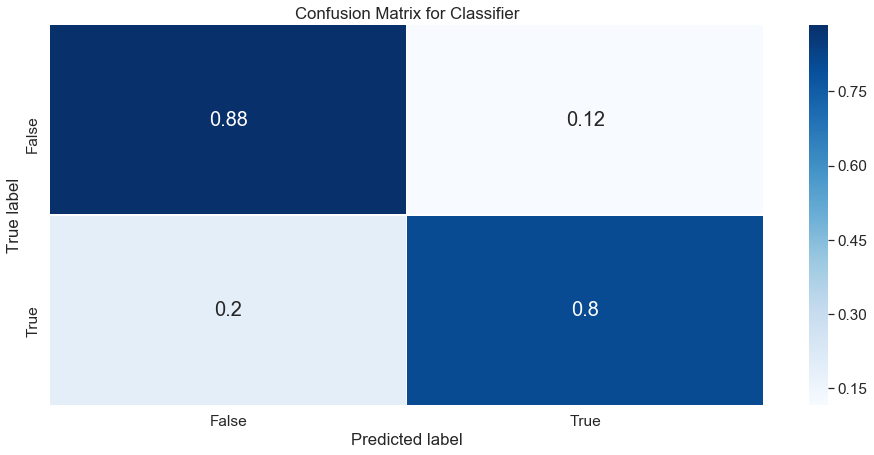

              precision    recall  f1-score   support

       False       0.96      0.88      0.92      3124
        True       0.56      0.80      0.66       575

    accuracy                           0.87      3699
   macro avg       0.76      0.84      0.79      3699
weighted avg       0.90      0.87      0.88      3699



0.8715869153825359

In [46]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', DecisionTreeClassifier(criterion='entropy',max_depth=1,max_leaf_nodes=13,min_samples_split=8))])
cufusiinmatrix_plot(myClassfier,X_new,Y_new,X_test,Y_test)

In [47]:
space = dict(classifier__leaf_size = list(range(1,50)),
         classifier__n_neighbors = list(range(1,30)), 
         classifier__p = [1,2])

myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', KNeighborsClassifier())])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
search = RandomizedSearchCV(myClassfier, space, n_iter=100, scoring='recall', n_jobs=-1, cv=cv, random_state=1) # recall scoring

result = search.fit(X_new,Y_new)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.994290673243811
Best Hyperparameters: {'classifier__p': 1, 'classifier__n_neighbors': 1, 'classifier__leaf_size': 19}


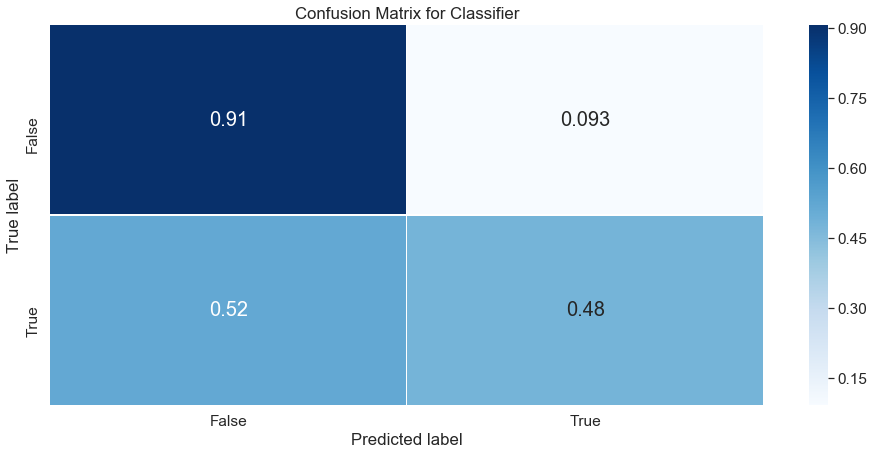

              precision    recall  f1-score   support

       False       0.90      0.91      0.91      3124
        True       0.49      0.48      0.48       575

    accuracy                           0.84      3699
   macro avg       0.70      0.69      0.69      3699
weighted avg       0.84      0.84      0.84      3699



0.8407677750743444

In [48]:
myClassfier = Pipeline([('preprocessing', preprocessor),('classifier', KNeighborsClassifier(p=2,n_neighbors=1,leaf_size=6))])
cufusiinmatrix_plot(myClassfier,X_new,Y_new,X_test,Y_test)

This hence does not lead to a preformance imporvement, prehaps a more sofiticated method is required (such as SMOTE) or the data is not imbalanced enough to cause problems.